# Lead Scoring Case Study 

Approach Followed

1 - Data Read, Analysis, Preparation

2 - EDA

3 - Outlier Analysis

4 - Modelling

5 - Model Evaluation

6-  Test Vs Train

7 - Precision Recall Analysis

8 - Top 3 variables identifed

## Importing Required Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# for dataframe manipulation 
import pandas as pd
pd.set_option('display.max_columns',500)

# for basic operations
import numpy as np

# for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

# for Linear Regression 
import statsmodels.api as sm
import sklearn 

# for splitting data into train and test data
from sklearn.model_selection import train_test_split

# for scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#For Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# For VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for evaluation
from sklearn import metrics

#for hopkins score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

#For Precision and recall tradeoff
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

#For F1 Score
from sklearn.metrics import f1_score

#For classification report
from sklearn.metrics import classification_report

## Step 1 : Reading and Understanding Data

In [3]:
# Reading dataset

data = pd.read_csv("Leads.csv")
lead_base_data = data # Will be used for the file output 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# inspecting dimensions 

data.shape

(9240, 37)

In [5]:
# inspecting column info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# inspecting numerical columns

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# inspecting categorical columns

data.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,209f2abd-fe9b-4707-9556-1a86d2ebce91,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


## Step 2: Cleaning Data

### Step 2.1 : Selecting and Converting columns with "Select" value to Null

In [8]:
# inspecting Specialization

data['Specialization'].value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

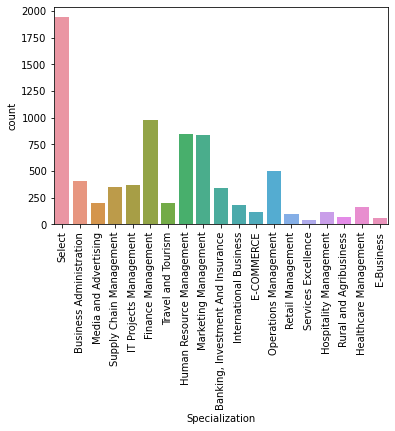

In [9]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [10]:
# converting 'select' value to null

data['Specialization'].replace('Select',np.nan,inplace=True)

In [11]:
# inspecting How did you hear about X Education

data['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [12]:
# converting 'select' value to null

data['How did you hear about X Education'].replace('Select',np.nan,inplace=True)

In [13]:
# inspecting City

data['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

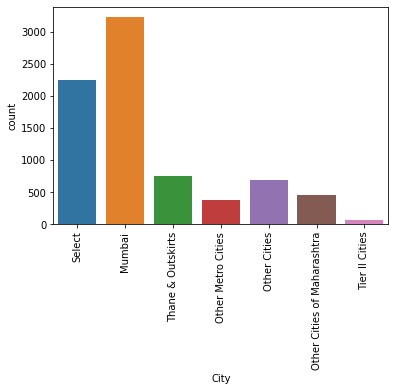

In [14]:
sns.countplot(data.City)
xticks(rotation = 90)

In [15]:
# converting 'select' values to null

data['City'].replace('Select',np.nan,inplace=True)

### Step 2.2 : Performing Null Value Check

In [16]:
# inspecting null values

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
# List of binary variables to map
varlist =  ['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Step 2.3 : Dropping columns with high percentage of missing values

In [18]:
# dropping columns

data.drop(columns=['How did you hear about X Education','Lead Quality','City',
                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Score'],inplace=True)

### Step 2.4 : Performing Skewness Check

In [19]:
# performing skewness check for Do Not Email

data['Do Not Email'].value_counts(normalize=True)*100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [20]:
# performing skewness check for Do Not Call

data['Do Not Call'].value_counts(normalize=True)*100

0    99.978355
1     0.021645
Name: Do Not Call, dtype: float64

In [21]:
# performing skewness check for Country

data['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
South Africa             0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Sweden                   0.044254
Philippines              0.029503
Ghana                    0.029503
Bangladesh               0.029503
China                    0.029503
Netherlands              0.029503
Belgium                  0.029503
Uganda                   0.029503
Asia/Pacific Region      0.029503
Italy                    0.029503
Russia                   0.014751
Sri Lanka     

In [22]:
# performing skewness check for What matters most to you in choosing a course

data['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# performing skewness check for Search

data['Search'].value_counts(normalize=True)*100

0    99.848485
1     0.151515
Name: Search, dtype: float64

In [24]:
# performing skewness check for Magazine

data['Magazine'].value_counts(normalize=True)*100

0    100.0
Name: Magazine, dtype: float64

In [25]:
# performing skewness check for Newspaper Article

data['Newspaper Article'].value_counts(normalize=True)*100

0    99.978355
1     0.021645
Name: Newspaper Article, dtype: float64

In [26]:
# performing skewness check for X Education Forums

data['X Education Forums'].value_counts(normalize=True)*100

0    99.989177
1     0.010823
Name: X Education Forums, dtype: float64

In [27]:
# performing skewness check for Newspaper

data['Newspaper'].value_counts(normalize=True)*100

0    99.989177
1     0.010823
Name: Newspaper, dtype: float64

In [28]:
# performing skewness check for Digital Advertisement

data['Digital Advertisement'].value_counts(normalize=True)*100

0    99.95671
1     0.04329
Name: Digital Advertisement, dtype: float64

In [29]:
# performing skewness check for Through Recommendations

data['Through Recommendations'].value_counts(normalize=True)*100

0    99.924242
1     0.075758
Name: Through Recommendations, dtype: float64

In [30]:
# performing skewness check for Receive More Updates About Our Courses

data['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

0    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [31]:
# performing skewness check for Update me on Supply Chain Content

data['Update me on Supply Chain Content'].value_counts(normalize=True)*100

0    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [32]:
# performing skewness check for Get updates on DM Content

data['Get updates on DM Content'].value_counts(normalize=True)*100

0    100.0
Name: Get updates on DM Content, dtype: float64

In [33]:
# performing skewness check for I agree to pay the amount through cheque

data['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

0    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [34]:
# performing skewness check for A free copy of Mastering The Interview

data['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

0    68.744589
1    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

On performing **skewness check** on the above variables we observe that they are **highly skewed** and **will not contribute to model building**, therefore we **drop** them. 

In [35]:
# dropping highly skewed variables 

data.drop(columns=['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course',
                   'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
                  'Search','Magazine','Newspaper Article','Digital Advertisement','X Education Forums','Newspaper',
                  'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content'],inplace=True)

### Step 2.5 : Dropping Lead Score Variables

In [36]:
# dropping Lead Score variables 

data.drop(columns=['Tags','Lead Profile'],inplace=True)

In [37]:
# inspecting data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Number                      9240 non-null   int64  
 2   Lead Origin                      9240 non-null   object 
 3   Lead Source                      9204 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Last Activity                    9137 non-null   object 
 9   Specialization                   5860 non-null   object 
 10  What is your current occupation  6550 non-null   object 
 11  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64

In [38]:
# dropping Last Notable Activity

data.drop('Last Notable Activity',axis=1,inplace=True)

### Step 2.6 : Dropping categorical columns 

In [39]:
# Get the value counts of all the columns
for columns in data:
    print(data[columns].astype('category').value_counts())
    print('#####################################')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
#####################################
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
#####################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
#####################################
Google  

In [40]:
#As seen in EDA and looping for all remaining columns, its pretty evident that some of columns are not adding any value hence these can be dropped for next step
data.drop(['Prospect ID'], axis = 1, inplace = True)

### Step 2.7 : Imputing missing values 

In [41]:
# inspecting null values

round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                         0.00
Lead Origin                         0.00
Lead Source                         0.39
Converted                           0.00
TotalVisits                         1.48
Total Time Spent on Website         0.00
Page Views Per Visit                1.48
Last Activity                       1.11
Specialization                     36.58
What is your current occupation    29.11
dtype: float64

In [42]:
# inspecting Lead Source

data['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
Pay per Click Ads     0.010865
testone               0.010865
blog                  0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
NC_EDM                0.010865
youtubechannel        0.010865
Name: Lead Source, dtype: float64

In [43]:
# imputing missing values for Lead Source

data['Lead Source'].fillna(data['Lead Source'].mode()[0],inplace=True)

In [44]:
#Check the values in Lead profile column before deciding what needs to be done
cnt = data["Lead Source"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df

,Labels,Values
0,Google,2904
1,Direct Traffic,2543
2,Olark Chat,1755
3,Organic Search,1154
4,Reference,534
5,Welingak Website,142
6,Referral Sites,125
7,Facebook,55
8,bing,6
9,google,5


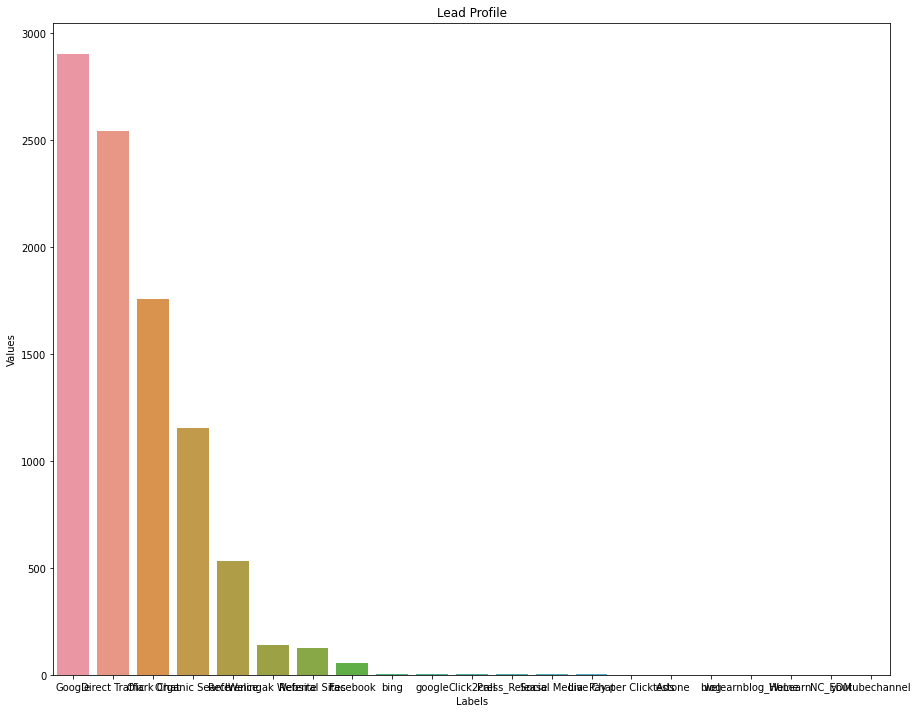

In [45]:
plt.figure(figsize=(15,12))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("Lead Profile")
plt.show()

In [46]:
# inspecting Total Visits

print('Mean : ',data['TotalVisits'].mean())
print('Median : ',data['TotalVisits'].median())

Mean :  3.445237833681204
Median :  3.0


In [47]:
# imputing missing values for Total Visits 

data['TotalVisits'].fillna(data['TotalVisits'].median(),inplace=True)

In [48]:
# inspecting Page Views Per Visit

print('Mean : ',data['Page Views Per Visit'].mean())
print('Median : ',data['Page Views Per Visit'].median())

Mean :  2.3628199494672093
Median :  2.0


In [49]:
# imputing missing values for Page Views Per Visit

data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(),inplace=True)

In [50]:
# inspecting Last Activity 

data['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [51]:
# imputing missing values for Last Activity 

data['Last Activity'].fillna(data['Last Activity'].mode()[0],inplace=True)

In [52]:
# inspecting What is your occupation 

data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [53]:
# imputing missing value for What is your occupation 

data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0],inplace=True)

In [54]:
# inspecting Specialization

data.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [55]:
# imputing missing value for Specialization 

data['Specialization'].fillna(data['Specialization'].mode()[0],inplace=True)

### Step 2.8: Combining Various Levels of Categorical Columns

From the above analysis of `Lead Source` we can combine 
1. `bing` and `google` as `Google`
2. and `Reference`, `Facebook`, `Social Media`, `Live Chat`, `youtubechannel`, `Social media`,  `Referral Sites`, `Click2call`, `Press_Release`, `blog`, `NC_EDM`, `WeLearn`, `welearnblog_Home`, `testone` and `Pay per Click Ads` as `Others`

In [56]:
# combining columns for Lead Source

data['Lead Source'] = data['Lead Source'].replace(['bing','google'],'Google')
data['Lead Source'] = data['Lead Source'].replace(['Reference','Facebook','Live Chat','youtubechannel','Social Media',
                                                    'Referral Sites','Click2call','Press_Release',
                                                    'blog','NC_EDM','WeLearn','welearnblog_Home','testone',
                                                    'Pay per Click Ads'],'Others')

# inspecting Lead Source

data['Lead Source'].value_counts(normalize=True)*100

Google              31.547619
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Others               7.911255
Welingak Website     1.536797
Name: Lead Source, dtype: float64

In [57]:
#Check the values in Lead profile column before deciding what needs to be done
cnt = data["Lead Source"].value_counts()
cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })
cnt_df

,Labels,Values
0,Google,2915
1,Direct Traffic,2543
2,Olark Chat,1755
3,Organic Search,1154
4,Others,731
5,Welingak Website,142


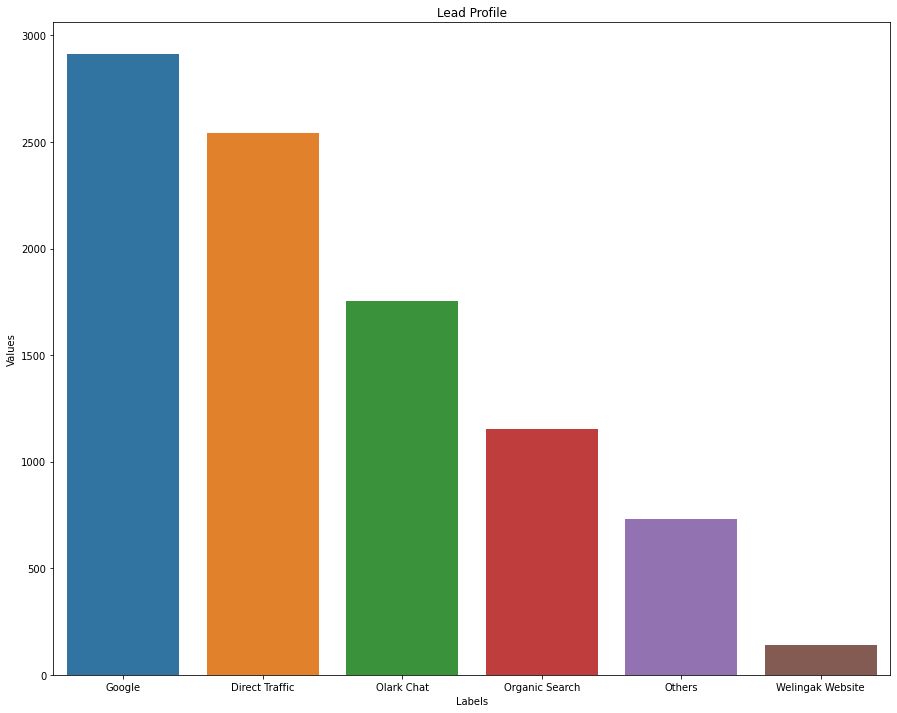

In [58]:
plt.figure(figsize=(15,12))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("Lead Profile")
plt.show()

From the above inspection of `Last Activity`, we can combine

`Page Visited on Website`, `Email Bounced`, `Email Link Clicked`, `Form Submitted on Website`, `Unreachable`, 
`Unsubscribed`, `Had a Phone Conversation`, `Approached upfront`, `View in browser link Clicked`, `Email Marked Spam`,
`Email Received`,`Visited Booth in Tradeshow` and `Resubscribed to emails` as `Others`

In [59]:
# combining columns for Last Activity

data['Last Activity'] = data['Last Activity'].replace(['Page Visited on Website', 'Email Bounced', 'Email Link Clicked',
                                                       'Form Submitted on Website', 'Unreachable', 'Unsubscribed', 
                                                       'Had a Phone Conversation', 'Approached upfront', 
                                                       'View in browser link Clicked', 'Email Marked Spam', 
                                                       'Email Received', 'Visited Booth in Tradeshow',
                                                       'Resubscribed to emails'],'Others')

# inspecting Last Activity

data['Last Activity'].value_counts(normalize=True)*100

Email Opened               38.311688
SMS Sent                   29.707792
Others                     16.818182
Olark Chat Conversation    10.530303
Converted to Lead           4.632035
Name: Last Activity, dtype: float64

From the above inspection of `Specialization`, we observe that   

1. `Retail Management`, `Hospitality Management`, `Healthcare Management`, `Supply Chain Management`, and
`IT Projects Management` can be combined as `Other Managements`  
2. And `Services Excellence`, `E-Business`, `Rural and Agribusiness`, `E-COMMERCE`, `International Business`, `Travel and Tourism`, `Media and Advertising`, and `Banking, Investment And Insurance` can be combined as `Others`

In [60]:
# combining levels 

data['Specialization'] = data['Specialization'].replace(['Retail Management', 'Hospitality Management', 
                                                          'Healthcare Management', 'Supply Chain Management', 
                                                          'IT Projects Management'],'Other Managements')
data['Specialization'] = data['Specialization'].replace(['Services Excellence', 'E-Business', 'Rural and Agribusiness', 
                                                         'E-COMMERCE', 'International Business', 'Travel and Tourism', 
                                                         'Media and Advertising', 'Banking, Investment And Insurance'], 'Others')

# inspecting Specializations

data['Specialization'].value_counts(normalize=True)*100

Finance Management           47.142857
Others                       13.030303
Other Managements            11.774892
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Business Administration       4.361472
Name: Specialization, dtype: float64

## Step 3 : Performing EDA

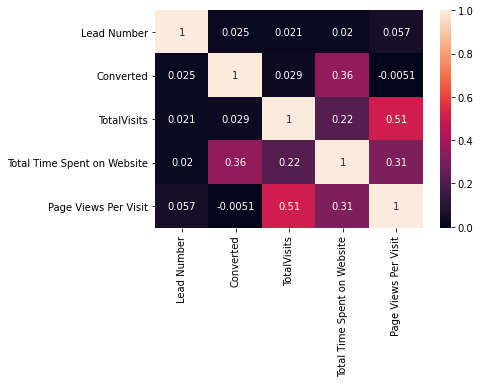

In [61]:
# inspecting correlation 

sns.heatmap(data.corr(),annot=True)

### Step 3.1 : Univariate Analysis

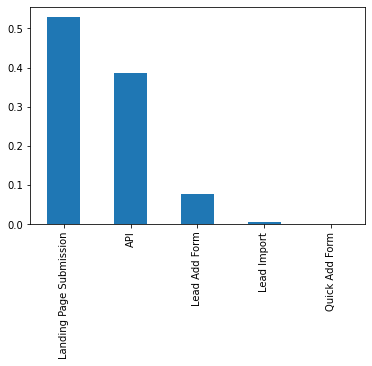

In [62]:
# analysing Lead Origin 

data['Lead Origin'].value_counts(normalize=True).plot(kind='bar')
plt.show()

We observe that more than **50%** of the `Leads` are procured by **In Page Suggestions** about the company. 

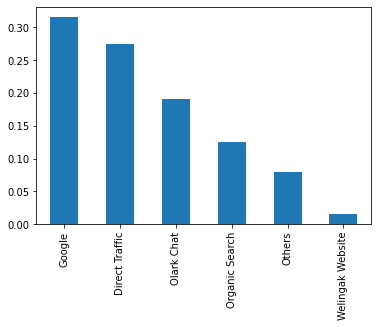

In [63]:
# analysing Lead Source

data['Lead Source'].value_counts(normalize=True).plot(kind='bar')
plt.show()

About **30%** of the procured leads have been introduced to the company by while surfing on `Google`.

In [64]:
# analysing Total Visits

data['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [65]:
# analysing Total Time Spent on Website

data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

**Average time** an individual spends on the website is around **248 seconds**.

In [66]:
# analysing Page Views Per Visit

data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

On **average** a person visits **2** pages per visit on the website.

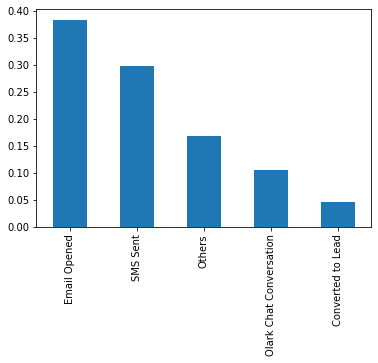

In [67]:
# analysing Last Activity

data['Last Activity'].value_counts(normalize=True).plot(kind='bar')

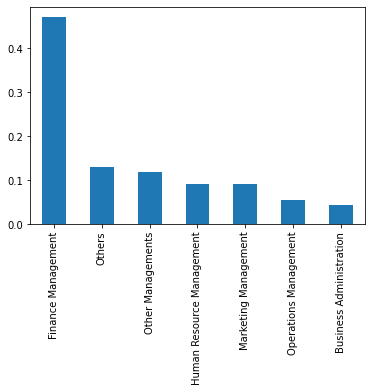

In [68]:
# analysing Specialization

data['Specialization'].value_counts(normalize=True).plot(kind='bar')

Majority of the specialization is for financial management

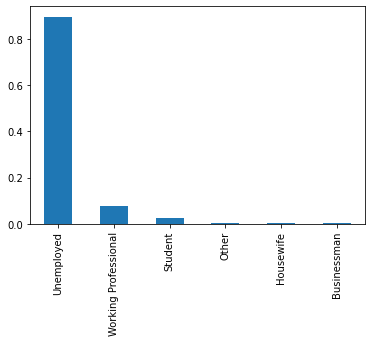

In [69]:
# analysing 

data['What is your current occupation'].value_counts(normalize=True).plot(kind='bar')

Majority of students who enquire or opt for the course are **Unemployed**.

In [70]:
data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation'],
      dtype='object')

## Step 3.2 : Bivariate Analysis

In [71]:
# Calculating the ratio of successful converted (1) or not (0).

Converison = (sum(data['Converted'])/len(data['Converted'].index))*100
Converison

38.53896103896104

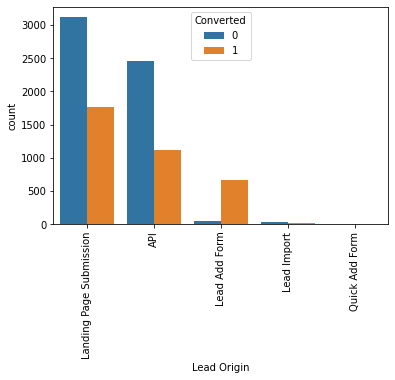

In [72]:
# analysing Lead Origin wrt the Target Variable

sns.countplot(x = "Lead Origin", hue = "Converted", data = data, order = data['Lead Origin'].value_counts().index)
xticks(rotation = 90)
plt.show()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

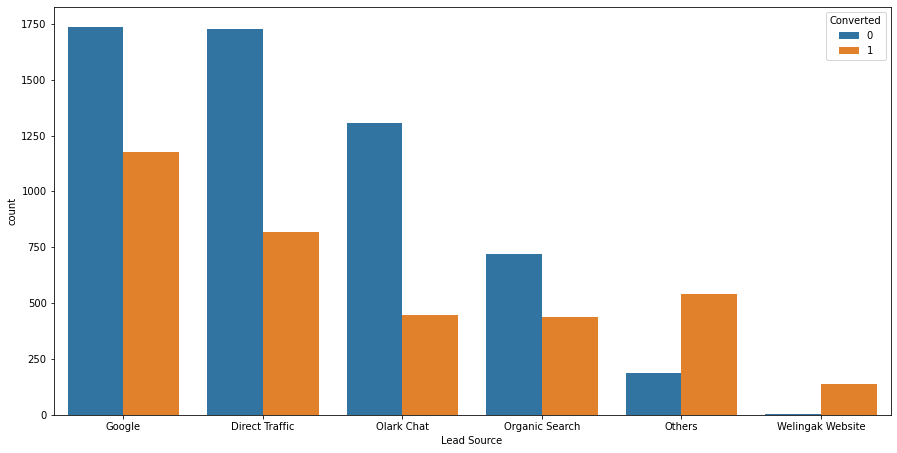

In [73]:
# analysing Lead Source wrt the Target Variable

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, order = data['Lead Source'].value_counts().index)
xticks(rotation = 360)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

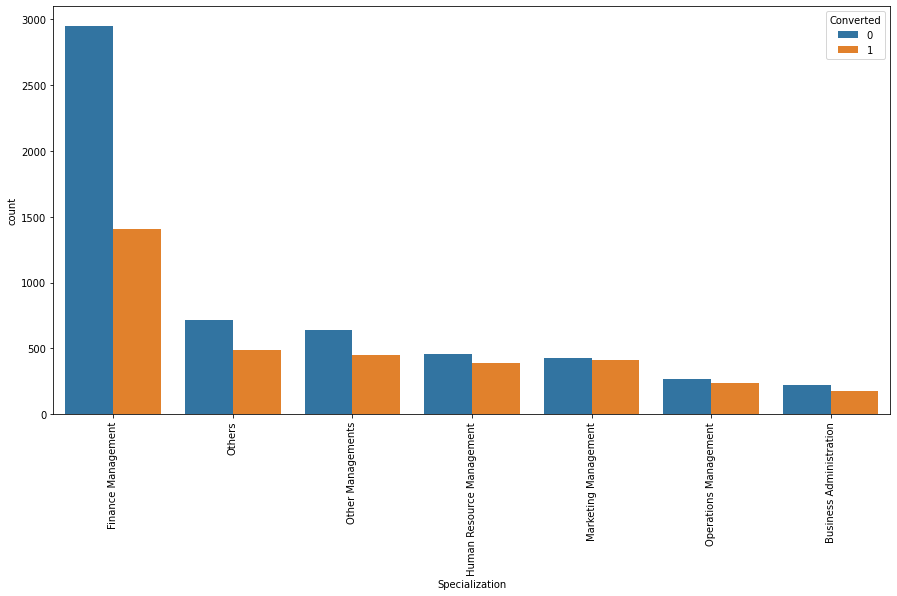

In [74]:
# analysing Specialization wrt the Target Variable

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Specialization", hue = "Converted", data = data, order = data['Specialization'].value_counts().index)
xticks(rotation = 90)

### Step 3.3 : Outlier Analysis

In [75]:
temp_2 = data.loc[:, data.dtypes == 'int64']
temp_2.columns

Index(['Lead Number', 'Converted', 'Total Time Spent on Website'], dtype='object')

In [76]:
# Checking for outliers in the continuous variables
num_lead = data[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]

In [77]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.438636,2.357440,487.698268
std,4.819024,2.145781,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
90%,7.000000,5.000000,1380.000000
95%,10.000000,6.000000,1562.000000
99%,17.000000,9.000000,1840.610000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9240 non-null   int64  
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9240 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9240 non-null   float64
 7   Last Activity                    9240 non-null   object 
 8   Specialization                   9240 non-null   object 
 9   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


## Step 4 : Data Preparation 

### Step 4.1 : Creating Dummy Variables 

In [79]:
# extracting categorical variable for conversion 
temp = data.loc[:, data.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [80]:
# creating dummy variables 

dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation']], drop_first=True)
data = pd.concat([data, dummy], axis=1)

# inspecting dataframe

data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,API,Olark Chat,0,0.0,0,0.0,Others,Finance Management,Unemployed,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Unemployed,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [81]:
# dropping repeated variables

data = data.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'])

In [82]:
# inspecting updated dataframe

data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Step 5 :  Model Building

In [83]:
# assigning values for analysis

X = data.drop(['Converted'], 1)
y = data['Converted']

In [84]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
# scaling variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,641410,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6795,597687,0.100767,0.005716,-0.470569,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,626825,0.290067,-0.691418,0.070401,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,587928,0.290067,1.365219,1.226321,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3934,622366,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [86]:
# Checking the Lead Conversion Rate
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.53896103896104

We have almost 39% conversion rate

In [87]:
X_train_LN = X_train
X_train = X_train.drop(['Lead Number'], 1)
X_train_LN.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,641410,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6795,597687,0.100767,0.005716,-0.470569,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,626825,0.290067,-0.691418,0.070401,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,587928,0.290067,1.365219,1.226321,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3934,622366,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [88]:
X_test_LN = X_test
X_test = X_test.drop(['Lead Number'], 1)
X_test_LN.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,619003,8.0,1011,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2376,636884,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
7766,590281,5.0,59,5.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9199,579892,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,617929,0.0,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Modelling

In [89]:
#We shall use the Linear Regression Library sm

In [90]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Mon, 14 Sep 2020   Deviance:                       5489.6
Time:                        12:19:19   Pearson chi2:                 7.53e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7787      1.106     -1.609      0.108      -3.946       0.389
TotalVisits                                              0.1977      0.053      3.732      0.000       0.094       0.302
Total Time Spent on Website                              1.0746      0.039     27.597      0.000       0.998       1.151
Page Views Per Visit                                    -0.1543      0.052     -2.965      0.003      -0.256      -0.052
Lead Origin_Landing Page Submission                     -0.4037      0.113     -3.578      0.000      -0.625      -0.183
Lead Origin_Lead Add Form                                3.0762      0.297     10.365      0.000       2.494       3.658
Lead Origin_Lead Import                                 -0.6188      0.578     -1.070      0.285      -1.752       0.515
Lead Origin_Quick Add Form                              20.5291   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.3829      0.094      4.085      0.000       0.199       0.567
Lead Source_Olark Chat                                   1.2098      0.150      8.040      0.000       0.915       1.505
Lead Source_Organic Search                               0.2095      0.125      1.682      0.093      -0.035       0.454
Lead Source_Others                                       0.3692      0.262      1.411      0.158      -0.144       0.882
Lead Source_Welingak Website                             2.5066      0.781      3.211      0.001       0.976       4.037
Last Activity_Email Opened                               1.3109      0.222      5.900      0.000       0.875       1.746
Last Activity_Olark Chat Conversation                   -0.2316      0.270     -0.859      0.390      -0.760       0.297
Last Activity_Others                                     0.5313      0.235      2.263      0.024       0.071       0.991
Last Activity_SMS Sent                                   2.3820      0.223     10.661      0.000       1.944       2.820
Specialization_Finance Management                       -0.3159      0.177     -1.788      0.074      -0.662       0.030
Specialization_Human Resource Management                 0.0691      0.193      0.358      0.721      -0.310       0.448
Specialization_Marketing Management                      0.1282      0.193      0.664      0.506      -0.250       0.506
Specialization_Operations Management                     0.0775      0.214      0.363      0.717      -0.341       0.496
Specialization_Other Managements                         0.0459      0.188      0.244      0.807      -0.323       0.415
Specialization_Others                                    0

In [91]:
#We shall use the library LogisticRegression
logreg = LogisticRegression()

In [92]:
rfe = RFE(logreg, 25)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True])

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 2),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other Managements', False, 3),
 ('Specialization_Others', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What 

In [95]:
col = X_train.columns[rfe.support_]

In [96]:
X_train.columns[~rfe.support_]

Index(['Specialization_Human Resource Management', 'Specialization_Other Managements'], dtype='object')

In [97]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [98]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Mon, 14 Sep 2020   Deviance:                       5489.7
Time:                        12:19:19   Pearson chi2:                 7.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7412      1.096     -1.589      0.112      -3.888       0.406
TotalVisits                                              0.1979      0.053      3.738      0.000       0.094       0.302
Total Time Spent on Website                              1.0749      0.039     27.606      0.000       0.999       1.151
Page Views Per Visit                                    -0.1541      0.052     -2.962      0.003      -0.256      -0.052
Lead Origin_Landing Page Submission                     -0.4036      0.113     -3.578      0.000      -0.625      -0.183
Lead Origin_Lead Add Form                                3.0776      0.297     10.370      0.000       2.496       3.659
Lead Origin_Lead Import                                 -0.6210      0.579     -1.073      0.283      -1.756       0.513
Lead Origin_Quick Add Form                              20.5283   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.3833      0.093      4.102      0.000       0.200       0.566
Lead Source_Olark Chat                                   1.2101      0.150      8.051      0.000       0.916       1.505
Lead Source_Organic Search                               0.2092      0.125      1.679      0.093      -0.035       0.453
Lead Source_Others                                       0.3689      0.262      1.410      0.158      -0.144       0.882
Lead Source_Welingak Website                             2.5065      0.781      3.211      0.001       0.977       4.036
Last Activity_Email Opened                               1.3105      0.222      5.899      0.000       0.875       1.746
Last Activity_Olark Chat Conversation                   -0.2319      0.270     -0.860      0.390      -0.760       0.297
Last Activity_Others                                     0.5308      0.235      2.261      0.024       0.071       0.991
Last Activity_SMS Sent                                   2.3811      0.223     10.658      0.000       1.943       2.819
Specialization_Finance Management                       -0.3623      0.102     -3.551      0.000      -0.562      -0.162
Specialization_Marketing Management                      0.0817      0.127      0.641      0.522      -0.168       0.331
Specialization_Operations Management                     0.0309      0.157      0.197      0.844      -0.276       0.338
Specialization_Others                                    0.1328      0.114      1.163      0.245      -0.091       0.357
What is your current occupation_Housewife               22.3180   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Other                   -0

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,What is your current occupation_Unemployed,33.36
12,Last Activity_Email Opened,9.67
15,Last Activity_SMS Sent,7.87
3,Lead Origin_Landing Page Submission,6.00
4,Lead Origin_Lead Add Form,5.24
14,Last Activity_Others,4.83
10,Lead Source_Others,4.72
16,Specialization_Finance Management,4.35
24,What is your current occupation_Working Profes...,3.82
8,Lead Source_Olark Chat,3.79


In [100]:
#To Manually drop the columns below logis is follow in the same order
#1 High P value and High VIF
#2 High P Value and Low VIF
#3 Low P Value and High VIF

In [101]:
#Dropping as the p value is high
X_train = X_train.drop('What is your current occupation_Unemployed',1)

In [102]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.1
Date:                Mon, 14 Sep 2020   Deviance:                       5490.1
Time:                        12:19:20   Pearson chi2:                 7.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4222      0.255     -9.501      0.000      -2.922      -1.922
TotalVisits                                              0.1979      0.053      3.736      0.000       0.094       0.302
Total Time Spent on Website                              1.0752      0.039     27.616      0.000       0.999       1.152
Page Views Per Visit                                    -0.1537      0.052     -2.956      0.003      -0.256      -0.052
Lead Origin_Landing Page Submission                     -0.4064      0.113     -3.606      0.000      -0.627      -0.185
Lead Origin_Lead Add Form                                3.0797      0.297     10.377      0.000       2.498       3.661
Lead Origin_Lead Import                                 -0.6211      0.579     -1.073      0.283      -1.756       0.514
Lead Origin_Quick Add Form                              20.5240   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.3824      0.093      4.093      0.000       0.199       0.566
Lead Source_Olark Chat                                   1.2091      0.150      8.045      0.000       0.914       1.504
Lead Source_Organic Search                               0.2103      0.125      1.689      0.091      -0.034       0.454
Lead Source_Others                                       0.3673      0.262      1.404      0.160      -0.145       0.880
Lead Source_Welingak Website                             2.5029      0.781      3.206      0.001       0.973       4.033
Last Activity_Email Opened                               1.3110      0.222      5.901      0.000       0.876       1.746
Last Activity_Olark Chat Conversation                   -0.2302      0.270     -0.854      0.393      -0.759       0.298
Last Activity_Others                                     0.5335      0.235      2.273      0.023       0.074       0.993
Last Activity_SMS Sent                                   2.3812      0.223     10.658      0.000       1.943       2.819
Specialization_Finance Management                       -0.3638      0.102     -3.566      0.000      -0.564      -0.164
Specialization_Marketing Management                      0.0815      0.127      0.639      0.523      -0.168       0.331
Specialization_Operations Management                     0.0298      0.157      0.190      0.849      -0.277       0.337
Specialization_Others                                    0.1315      0.114      1.151      0.250      -0.092       0.355
What is your current occupation_Housewife               23.0006   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Other                    0

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,5.24
12,Last Activity_Email Opened,4.97
10,Lead Source_Others,4.57
15,Last Activity_SMS Sent,4.28
3,Lead Origin_Landing Page Submission,4.21
16,Specialization_Finance Management,3.59
8,Lead Source_Olark Chat,3.51
14,Last Activity_Others,2.76
13,Last Activity_Olark Chat Conversation,2.40
7,Lead Source_Google,2.28


In [104]:
X_train = X_train.drop('Lead Origin_Quick Add Form',1)

In [105]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.2
Date:                Mon, 14 Sep 2020   Deviance:                       5490.3
Time:                        12:19:20   Pearson chi2:                 7.51e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4217      0.255     -9.499      0.000      -2.921      -1.922
TotalVisits                                              0.1978      0.053      3.735      0.000       0.094       0.302
Total Time Spent on Website                              1.0757      0.039     27.639      0.000       0.999       1.152
Page Views Per Visit                                    -0.1537      0.052     -2.958      0.003      -0.256      -0.052
Lead Origin_Landing Page Submission                     -0.4074      0.113     -3.617      0.000      -0.628      -0.187
Lead Origin_Lead Add Form                                3.0795      0.297     10.376      0.000       2.498       3.661
Lead Origin_Lead Import                                 -0.6212      0.579     -1.073      0.283      -1.756       0.514
Lead Source_Google                                       0.3826      0.093      4.095      0.000       0.200       0.566
Lead Source_Olark Chat                                   1.2089      0.150      8.043      0.000       0.914       1.504
Lead Source_Organic Search                               0.2101      0.125      1.687      0.092      -0.034       0.454
Lead Source_Others                                       0.3671      0.262      1.403      0.161      -0.146       0.880
Lead Source_Welingak Website                             2.5030      0.781      3.207      0.001       0.973       4.033
Last Activity_Email Opened                               1.3111      0.222      5.901      0.000       0.876       1.747
Last Activity_Olark Chat Conversation                   -0.2301      0.270     -0.853      0.393      -0.759       0.298
Last Activity_Others                                     0.5345      0.235      2.278      0.023       0.075       0.995
Last Activity_SMS Sent                                   2.3814      0.223     10.659      0.000       1.944       2.819
Specialization_Finance Management                       -0.3643      0.102     -3.570      0.000      -0.564      -0.164
Specialization_Marketing Management                      0.0814      0.127      0.639      0.523      -0.168       0.331
Specialization_Operations Management                     0.0298      0.157      0.190      0.849      -0.277       0.337
Specialization_Others                                    0.1326      0.114      1.161      0.246      -0.091       0.356
What is your current occupation_Housewife               23.0007   1.38e+04      0.002      0.999   -2.71e+04    2.71e+04
What is your current occupation_Other                    0.0764      0.814      0.094      0.925      -1.519       1.672
What is your current occupation_Student                  0

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,5.24
11,Last Activity_Email Opened,4.97
9,Lead Source_Others,4.57
14,Last Activity_SMS Sent,4.28
3,Lead Origin_Landing Page Submission,4.21
15,Specialization_Finance Management,3.59
7,Lead Source_Olark Chat,3.51
13,Last Activity_Others,2.76
12,Last Activity_Olark Chat Conversation,2.40
6,Lead Source_Google,2.28


In [107]:
X_train = X_train.drop('What is your current occupation_Housewife',1)

In [108]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.8
Date:                Mon, 14 Sep 2020   Deviance:                       5505.6
Time:                        12:19:20   Pearson chi2:                 7.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4301      0.255     -9.539      0.000      -2.929      -1.931
TotalVisits                                              0.1946      0.053      3.701      0.000       0.092       0.298
Total Time Spent on Website                              1.0748      0.039     27.654      0.000       0.999       1.151
Page Views Per Visit                                    -0.1565      0.052     -3.013      0.003      -0.258      -0.055
Lead Origin_Landing Page Submission                     -0.3958      0.112     -3.519      0.000      -0.616      -0.175
Lead Origin_Lead Add Form                                3.0990      0.297     10.441      0.000       2.517       3.681
Lead Origin_Lead Import                                 -0.6284      0.579     -1.086      0.278      -1.763       0.506
Lead Source_Google                                       0.3896      0.093      4.177      0.000       0.207       0.572
Lead Source_Olark Chat                                   1.2103      0.150      8.061      0.000       0.916       1.505
Lead Source_Organic Search                               0.2216      0.124      1.783      0.075      -0.022       0.465
Lead Source_Others                                       0.3771      0.261      1.442      0.149      -0.135       0.890
Lead Source_Welingak Website                             2.4839      0.781      3.182      0.001       0.954       4.014
Last Activity_Email Opened                               1.3213      0.222      5.951      0.000       0.886       1.756
Last Activity_Olark Chat Conversation                   -0.2238      0.269     -0.831      0.406      -0.752       0.304
Last Activity_Others                                     0.5463      0.234      2.330      0.020       0.087       1.006
Last Activity_SMS Sent                                   2.3822      0.223     10.668      0.000       1.945       2.820
Specialization_Finance Management                       -0.3693      0.102     -3.627      0.000      -0.569      -0.170
Specialization_Marketing Management                      0.0707      0.127      0.556      0.579      -0.179       0.320
Specialization_Operations Management                     0.0188      0.156      0.120      0.904      -0.288       0.325
Specialization_Others                                    0.1285      0.114      1.128      0.259      -0.095       0.352
What is your current occupation_Other                    0.0746      0.814      0.092      0.927      -1.522       1.671
What is your current occupation_Student                  0.3970      0.231      1.719      0.086      -0.056       0.850
What is your current occupation_Working Professional     2

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,5.23
11,Last Activity_Email Opened,4.97
9,Lead Source_Others,4.57
14,Last Activity_SMS Sent,4.28
3,Lead Origin_Landing Page Submission,4.20
15,Specialization_Finance Management,3.59
7,Lead Source_Olark Chat,3.51
13,Last Activity_Others,2.76
12,Last Activity_Olark Chat Conversation,2.40
6,Lead Source_Google,2.28


In [110]:
X_train = X_train.drop('What is your current occupation_Other',1)

In [111]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.8
Date:                Mon, 14 Sep 2020   Deviance:                       5505.6
Time:                        12:19:21   Pearson chi2:                 7.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4297      0.255     -9.539      0.000      -2.929      -1.930
TotalVisits                                              0.1947      0.053      3.704      0.000       0.092       0.298
Total Time Spent on Website                              1.0749      0.039     27.665      0.000       0.999       1.151
Page Views Per Visit                                    -0.1565      0.052     -3.012      0.003      -0.258      -0.055
Lead Origin_Landing Page Submission                     -0.3960      0.112     -3.522      0.000      -0.616      -0.176
Lead Origin_Lead Add Form                                3.0993      0.297     10.442      0.000       2.518       3.681
Lead Origin_Lead Import                                 -0.6282      0.579     -1.086      0.278      -1.762       0.506
Lead Source_Google                                       0.3892      0.093      4.177      0.000       0.207       0.572
Lead Source_Olark Chat                                   1.2100      0.150      8.061      0.000       0.916       1.504
Lead Source_Organic Search                               0.2214      0.124      1.782      0.075      -0.022       0.465
Lead Source_Others                                       0.3766      0.261      1.441      0.150      -0.136       0.889
Lead Source_Welingak Website                             2.4834      0.781      3.182      0.001       0.954       4.013
Last Activity_Email Opened                               1.3214      0.222      5.952      0.000       0.886       1.757
Last Activity_Olark Chat Conversation                   -0.2234      0.269     -0.829      0.407      -0.752       0.305
Last Activity_Others                                     0.5465      0.234      2.331      0.020       0.087       1.006
Last Activity_SMS Sent                                   2.3822      0.223     10.668      0.000       1.945       2.820
Specialization_Finance Management                       -0.3693      0.102     -3.628      0.000      -0.569      -0.170
Specialization_Marketing Management                      0.0711      0.127      0.559      0.576      -0.178       0.320
Specialization_Operations Management                     0.0187      0.156      0.119      0.905      -0.288       0.325
Specialization_Others                                    0.1285      0.114      1.128      0.259      -0.095       0.352
What is your current occupation_Student                  0.3968      0.231      1.718      0.086      -0.056       0.849
What is your current occupation_Working Professional     2.8702      0.189     15.192      0.000       2.500       3.240
==========================================================

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,5.23
11,Last Activity_Email Opened,4.97
9,Lead Source_Others,4.56
14,Last Activity_SMS Sent,4.28
3,Lead Origin_Landing Page Submission,4.20
15,Specialization_Finance Management,3.59
7,Lead Source_Olark Chat,3.51
13,Last Activity_Others,2.75
12,Last Activity_Olark Chat Conversation,2.39
6,Lead Source_Google,2.28


In [113]:
X_train = X_train.drop('Lead Origin_Lead Add Form',1)

In [114]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.5
Date:                Mon, 14 Sep 2020   Deviance:                       5642.9
Time:                        12:19:21   Pearson chi2:                 7.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4029      0.255     -9.433      0.000      -2.902      -1.904
TotalVisits                                              0.1518      0.049      3.104      0.002       0.056       0.248
Total Time Spent on Website                              1.0325      0.038     27.021      0.000       0.958       1.107
Page Views Per Visit                                    -0.2768      0.051     -5.388      0.000      -0.377      -0.176
Lead Origin_Landing Page Submission                     -0.5569      0.111     -5.017      0.000      -0.774      -0.339
Lead Origin_Lead Import                                 -2.7357      0.535     -5.115      0.000      -3.784      -1.687
Lead Source_Google                                       0.4110      0.093      4.424      0.000       0.229       0.593
Lead Source_Olark Chat                                   0.9110      0.146      6.250      0.000       0.625       1.197
Lead Source_Organic Search                               0.2654      0.124      2.138      0.032       0.022       0.509
Lead Source_Others                                       2.2539      0.166     13.569      0.000       1.928       2.580
Lead Source_Welingak Website                             5.2671      0.731      7.201      0.000       3.834       6.701
Last Activity_Email Opened                               1.5177      0.223      6.819      0.000       1.082       1.954
Last Activity_Olark Chat Conversation                   -0.1245      0.271     -0.460      0.645      -0.655       0.406
Last Activity_Others                                     0.7332      0.234      3.129      0.002       0.274       1.192
Last Activity_SMS Sent                                   2.6290      0.224     11.747      0.000       2.190       3.068
Specialization_Finance Management                       -0.4799      0.100     -4.817      0.000      -0.675      -0.285
Specialization_Marketing Management                      0.0689      0.125      0.550      0.582      -0.177       0.314
Specialization_Operations Management                    -0.0077      0.154     -0.050      0.960      -0.310       0.295
Specialization_Others                                    0.1167      0.113      1.036      0.300      -0.104       0.337
What is your current occupation_Student                  0.4561      0.224      2.037      0.042       0.017       0.895
What is your current occupation_Working Professional     2.9073      0.188     15.457      0.000       2.539       3.276
========================================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,4.88
13,Last Activity_SMS Sent,4.15
3,Lead Origin_Landing Page Submission,4.12
14,Specialization_Finance Management,3.56
6,Lead Source_Olark Chat,3.44
12,Last Activity_Others,2.72
11,Last Activity_Olark Chat Conversation,2.38
5,Lead Source_Google,2.28
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.85


In [116]:
X_train = X_train.drop('Specialization_Operations Management',1)

In [117]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.5
Date:                Mon, 14 Sep 2020   Deviance:                       5642.9
Time:                        12:19:21   Pearson chi2:                 7.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4042      0.254     -9.481      0.000      -2.901      -1.907
TotalVisits                                              0.1518      0.049      3.105      0.002       0.056       0.248
Total Time Spent on Website                              1.0325      0.038     27.023      0.000       0.958       1.107
Page Views Per Visit                                    -0.2768      0.051     -5.388      0.000      -0.377      -0.176
Lead Origin_Landing Page Submission                     -0.5568      0.111     -5.017      0.000      -0.774      -0.339
Lead Origin_Lead Import                                 -2.7354      0.535     -5.115      0.000      -3.784      -1.687
Lead Source_Google                                       0.4109      0.093      4.424      0.000       0.229       0.593
Lead Source_Olark Chat                                   0.9109      0.146      6.250      0.000       0.625       1.197
Lead Source_Organic Search                               0.2652      0.124      2.138      0.033       0.022       0.508
Lead Source_Others                                       2.2540      0.166     13.570      0.000       1.928       2.580
Lead Source_Welingak Website                             5.2672      0.731      7.201      0.000       3.834       6.701
Last Activity_Email Opened                               1.5175      0.223      6.819      0.000       1.081       1.954
Last Activity_Olark Chat Conversation                   -0.1247      0.271     -0.461      0.645      -0.655       0.406
Last Activity_Others                                     0.7331      0.234      3.129      0.002       0.274       1.192
Last Activity_SMS Sent                                   2.6288      0.224     11.748      0.000       2.190       3.067
Specialization_Finance Management                       -0.4785      0.095     -5.011      0.000      -0.666      -0.291
Specialization_Marketing Management                      0.0703      0.122      0.576      0.565      -0.169       0.310
Specialization_Others                                    0.1181      0.109      1.082      0.279      -0.096       0.332
What is your current occupation_Student                  0.4562      0.224      2.038      0.042       0.017       0.895
What is your current occupation_Working Professional     2.9070      0.188     15.461      0.000       2.538       3.276
========================================================================================================================
"""

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_Email Opened,4.77
3,Lead Origin_Landing Page Submission,4.10
13,Last Activity_SMS Sent,4.07
6,Lead Source_Olark Chat,3.43
14,Specialization_Finance Management,3.31
12,Last Activity_Others,2.69
11,Last Activity_Olark Chat Conversation,2.36
5,Lead Source_Google,2.27
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.85


In [119]:
X_train = X_train.drop('Last Activity_Olark Chat Conversation',1)

In [120]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.6
Date:                Mon, 14 Sep 2020   Deviance:                       5643.1
Time:                        12:19:21   Pearson chi2:                 7.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4848      0.186    -13.390      0.000      -2.848      -2.121
TotalVisits                                              0.1507      0.049      3.101      0.002       0.055       0.246
Total Time Spent on Website                              1.0329      0.038     27.029      0.000       0.958       1.108
Page Views Per Visit                                    -0.2784      0.051     -5.432      0.000      -0.379      -0.178
Lead Origin_Landing Page Submission                     -0.5551      0.111     -5.002      0.000      -0.773      -0.338
Lead Origin_Lead Import                                 -2.7355      0.535     -5.115      0.000      -3.784      -1.687
Lead Source_Google                                       0.4104      0.093      4.417      0.000       0.228       0.593
Lead Source_Olark Chat                                   0.9013      0.144      6.250      0.000       0.619       1.184
Lead Source_Organic Search                               0.2665      0.124      2.148      0.032       0.023       0.510
Lead Source_Others                                       2.2518      0.166     13.560      0.000       1.926       2.577
Lead Source_Welingak Website                             5.2646      0.731      7.198      0.000       3.831       6.698
Last Activity_Email Opened                               1.5993      0.137     11.686      0.000       1.331       1.867
Last Activity_Others                                     0.8144      0.156      5.208      0.000       0.508       1.121
Last Activity_SMS Sent                                   2.7100      0.140     19.307      0.000       2.435       2.985
Specialization_Finance Management                       -0.4788      0.096     -5.012      0.000      -0.666      -0.292
Specialization_Marketing Management                      0.0714      0.122      0.585      0.559      -0.168       0.311
Specialization_Others                                    0.1182      0.109      1.083      0.279      -0.096       0.332
What is your current occupation_Student                  0.4546      0.224      2.032      0.042       0.016       0.893
What is your current occupation_Working Professional     2.9114      0.188     15.484      0.000       2.543       3.280
========================================================================================================================
"""

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.27
10,Last Activity_Email Opened,3.01
13,Specialization_Finance Management,2.87
12,Last Activity_SMS Sent,2.73
6,Lead Source_Olark Chat,2.43
5,Lead Source_Google,2.03
11,Last Activity_Others,1.94
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.66
7,Lead Source_Organic Search,1.45


In [122]:
X_train = X_train.drop('Specialization_Marketing Management',1)

In [123]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.7
Date:                Mon, 14 Sep 2020   Deviance:                       5643.5
Time:                        12:19:22   Pearson chi2:                 7.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4632      0.182    -13.550      0.000      -2.819      -2.107
TotalVisits                                              0.1501      0.049      3.091      0.002       0.055       0.245
Total Time Spent on Website                              1.0326      0.038     27.023      0.000       0.958       1.107
Page Views Per Visit                                    -0.2781      0.051     -5.426      0.000      -0.379      -0.178
Lead Origin_Landing Page Submission                     -0.5582      0.111     -5.036      0.000      -0.776      -0.341
Lead Origin_Lead Import                                 -2.7401      0.535     -5.121      0.000      -3.789      -1.691
Lead Source_Google                                       0.4110      0.093      4.423      0.000       0.229       0.593
Lead Source_Olark Chat                                   0.8996      0.144      6.240      0.000       0.617       1.182
Lead Source_Organic Search                               0.2631      0.124      2.123      0.034       0.020       0.506
Lead Source_Others                                       2.2511      0.166     13.559      0.000       1.926       2.577
Lead Source_Welingak Website                             5.2622      0.731      7.195      0.000       3.829       6.696
Last Activity_Email Opened                               1.5975      0.137     11.677      0.000       1.329       1.866
Last Activity_Others                                     0.8124      0.156      5.197      0.000       0.506       1.119
Last Activity_SMS Sent                                   2.7083      0.140     19.303      0.000       2.433       2.983
Specialization_Finance Management                       -0.4973      0.090     -5.521      0.000      -0.674      -0.321
Specialization_Others                                    0.1019      0.106      0.965      0.334      -0.105       0.309
What is your current occupation_Student                  0.4550      0.224      2.034      0.042       0.016       0.893
What is your current occupation_Working Professional     2.9114      0.188     15.478      0.000       2.543       3.280
========================================================================================================================
"""

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.21
10,Last Activity_Email Opened,2.98
12,Last Activity_SMS Sent,2.71
13,Specialization_Finance Management,2.66
6,Lead Source_Olark Chat,2.38
5,Lead Source_Google,1.99
11,Last Activity_Others,1.93
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.64
7,Lead Source_Organic Search,1.45


In [125]:
X_train = X_train.drop('Specialization_Others',1)

In [126]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.2
Date:                Mon, 14 Sep 2020   Deviance:                       5644.4
Time:                        12:19:22   Pearson chi2:                 7.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4435      0.181    -13.528      0.000      -2.797      -2.089
TotalVisits                                              0.1502      0.049      3.091      0.002       0.055       0.245
Total Time Spent on Website                              1.0312      0.038     27.018      0.000       0.956       1.106
Page Views Per Visit                                    -0.2756      0.051     -5.387      0.000      -0.376      -0.175
Lead Origin_Landing Page Submission                     -0.5551      0.111     -5.011      0.000      -0.772      -0.338
Lead Origin_Lead Import                                 -2.7387      0.535     -5.115      0.000      -3.788      -1.689
Lead Source_Google                                       0.4101      0.093      4.414      0.000       0.228       0.592
Lead Source_Olark Chat                                   0.9033      0.144      6.269      0.000       0.621       1.186
Lead Source_Organic Search                               0.2723      0.124      2.204      0.028       0.030       0.514
Lead Source_Others                                       2.2514      0.166     13.561      0.000       1.926       2.577
Lead Source_Welingak Website                             5.2645      0.731      7.198      0.000       3.831       6.698
Last Activity_Email Opened                               1.5975      0.137     11.674      0.000       1.329       1.866
Last Activity_Others                                     0.8155      0.156      5.217      0.000       0.509       1.122
Last Activity_SMS Sent                                   2.7102      0.140     19.311      0.000       2.435       2.985
Specialization_Finance Management                       -0.5201      0.087     -5.983      0.000      -0.690      -0.350
What is your current occupation_Student                  0.4606      0.224      2.060      0.039       0.022       0.899
What is your current occupation_Working Professional     2.9057      0.188     15.455      0.000       2.537       3.274
========================================================================================================================
"""

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.12
10,Last Activity_Email Opened,2.96
12,Last Activity_SMS Sent,2.69
13,Specialization_Finance Management,2.52
6,Lead Source_Olark Chat,2.35
5,Lead Source_Google,1.98
11,Last Activity_Others,1.91
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.63
7,Lead Source_Organic Search,1.42


In [128]:
X_train = X_train.drop('What is your current occupation_Student',1)

In [129]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2824.3
Date:                Mon, 14 Sep 2020   Deviance:                       5648.5
Time:                        12:19:22   Pearson chi2:                 7.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4326      0.180    -13.480      0.000      -2.786      -2.079
TotalVisits                                              0.1493      0.048      3.081      0.002       0.054       0.244
Total Time Spent on Website                              1.0309      0.038     27.022      0.000       0.956       1.106
Page Views Per Visit                                    -0.2766      0.051     -5.411      0.000      -0.377      -0.176
Lead Origin_Landing Page Submission                     -0.5533      0.111     -4.999      0.000      -0.770      -0.336
Lead Origin_Lead Import                                 -2.7546      0.535     -5.148      0.000      -3.803      -1.706
Lead Source_Google                                       0.4066      0.093      4.380      0.000       0.225       0.589
Lead Source_Olark Chat                                   0.9039      0.144      6.273      0.000       0.621       1.186
Lead Source_Organic Search                               0.2685      0.123      2.176      0.030       0.027       0.510
Lead Source_Others                                       2.2547      0.166     13.595      0.000       1.930       2.580
Lead Source_Welingak Website                             5.2513      0.731      7.180      0.000       3.818       6.685
Last Activity_Email Opened                               1.6008      0.137     11.697      0.000       1.333       1.869
Last Activity_Others                                     0.8146      0.156      5.211      0.000       0.508       1.121
Last Activity_SMS Sent                                   2.7055      0.140     19.281      0.000       2.431       2.981
Specialization_Finance Management                       -0.5192      0.087     -5.976      0.000      -0.689      -0.349
What is your current occupation_Working Professional     2.8947      0.188     15.406      0.000       2.526       3.263
========================================================================================================================
"""

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.11
10,Last Activity_Email Opened,2.96
12,Last Activity_SMS Sent,2.69
13,Specialization_Finance Management,2.52
6,Lead Source_Olark Chat,2.35
5,Lead Source_Google,1.98
11,Last Activity_Others,1.91
2,Page Views Per Visit,1.87
8,Lead Source_Others,1.63
7,Lead Source_Organic Search,1.42


In [131]:
X_train = X_train.drop('Lead Source_Organic Search',1)

In [132]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2826.6
Date:                Mon, 14 Sep 2020   Deviance:                       5653.3
Time:                        12:19:22   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2964      0.169    -13.598      0.000      -2.627      -1.965
TotalVisits                                              0.1543      0.050      3.103      0.002       0.057       0.252
Total Time Spent on Website                              1.0287      0.038     26.983      0.000       0.954       1.103
Page Views Per Visit                                    -0.2510      0.050     -5.050      0.000      -0.348      -0.154
Lead Origin_Landing Page Submission                     -0.6216      0.106     -5.857      0.000      -0.830      -0.414
Lead Origin_Lead Import                                 -2.7561      0.535     -5.149      0.000      -3.805      -1.707
Lead Source_Google                                       0.3082      0.081      3.816      0.000       0.150       0.467
Lead Source_Olark Chat                                   0.7981      0.135      5.902      0.000       0.533       1.063
Lead Source_Others                                       2.1408      0.157     13.640      0.000       1.833       2.448
Lead Source_Welingak Website                             5.1465      0.730      7.052      0.000       3.716       6.577
Last Activity_Email Opened                               1.5947      0.137     11.649      0.000       1.326       1.863
Last Activity_Others                                     0.8093      0.156      5.175      0.000       0.503       1.116
Last Activity_SMS Sent                                   2.7048      0.140     19.268      0.000       2.430       2.980
Specialization_Finance Management                       -0.5192      0.087     -5.984      0.000      -0.689      -0.349
What is your current occupation_Working Professional     2.8891      0.187     15.409      0.000       2.522       3.257
========================================================================================================================
"""

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.11
9,Last Activity_Email Opened,2.81
11,Last Activity_SMS Sent,2.54
12,Specialization_Finance Management,2.38
6,Lead Source_Olark Chat,2.28
10,Last Activity_Others,1.84
2,Page Views Per Visit,1.78
5,Lead Source_Google,1.73
7,Lead Source_Others,1.58
0,TotalVisits,1.32


In [134]:
X_train = X_train.drop('TotalVisits',1)

In [135]:
# Refit the model with the new set of features
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.7
Date:                Mon, 14 Sep 2020   Deviance:                       5669.4
Time:                        12:19:22   Pearson chi2:                 7.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2894      0.169    -13.577      0.000      -2.620      -1.959
Total Time Spent on Website                              1.0302      0.038     27.082      0.000       0.956       1.105
Page Views Per Visit                                    -0.1850      0.045     -4.125      0.000      -0.273      -0.097
Lead Origin_Landing Page Submission                     -0.6210      0.106     -5.859      0.000      -0.829      -0.413
Lead Origin_Lead Import                                 -2.7561      0.535     -5.154      0.000      -3.804      -1.708
Lead Source_Google                                       0.2986      0.081      3.704      0.000       0.141       0.457
Lead Source_Olark Chat                                   0.7695      0.135      5.718      0.000       0.506       1.033
Lead Source_Others                                       2.1231      0.157     13.552      0.000       1.816       2.430
Lead Source_Welingak Website                             5.1078      0.729      7.005      0.000       3.679       6.537
Last Activity_Email Opened                               1.5989      0.137     11.700      0.000       1.331       1.867
Last Activity_Others                                     0.8636      0.155      5.565      0.000       0.559       1.168
Last Activity_SMS Sent                                   2.6988      0.140     19.258      0.000       2.424       2.973
Specialization_Finance Management                       -0.5243      0.087     -6.049      0.000      -0.694      -0.354
What is your current occupation_Working Professional     2.8732      0.187     15.368      0.000       2.507       3.240
========================================================================================================================
"""

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.11
8,Last Activity_Email Opened,2.81
10,Last Activity_SMS Sent,2.54
11,Specialization_Finance Management,2.38
5,Lead Source_Olark Chat,2.28
9,Last Activity_Others,1.82
4,Lead Source_Google,1.73
6,Lead Source_Others,1.58
1,Page Views Per Visit,1.56
0,Total Time Spent on Website,1.25


# Model Evaluation

In [137]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.323651
6795    0.144084
3516    0.276217
8105    0.802893
3934    0.234879
4844    0.988768
3297    0.128938
8071    0.984580
987     0.146337
7423    0.894952
dtype: float64

In [138]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32365056, 0.14408386, 0.27621704, 0.80289277, 0.23487928,
       0.98876816, 0.12893812, 0.98457974, 0.1463372 , 0.89495243])

In [139]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.323651,1871
1,0,0.144084,6795
2,0,0.276217,3516
3,0,0.802893,8105
4,0,0.234879,3934


In [140]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.323651,1871,0
1,0,0.144084,6795,0
2,0,0.276217,3516,0
3,0,0.802893,8105,1
4,0,0.234879,3934,0


In [141]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3584  418]
 [ 829 1637]]


In [142]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.807204700061843


In [143]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Calculate the sensitivity

TP/(TP+FN)

0.6638280616382806

In [145]:
# Calculate the specificity

TN/(TN+FP)

0.895552223888056

In [146]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

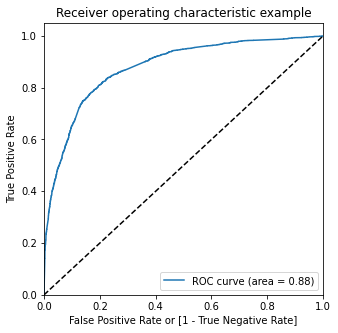

In [148]:
# Call the ROC function and draw the roc curbe

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the curve is 0.88 which is good

In [149]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.323651,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.144084,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.276217,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.802893,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.234879,3934,0,1,1,1,0,0,0,0,0,0,0
5,1,0.988768,4844,1,1,1,1,1,1,1,1,1,1,1
6,0,0.128938,3297,0,1,1,0,0,0,0,0,0,0,0
7,1,0.984580,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.146337,987,0,1,1,0,0,0,0,0,0,0,0
9,1,0.894952,7423,1,1,1,1,1,1,1,1,1,1,0


In [150]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598021  0.967153  0.370565
0.2   0.2  0.723253  0.918491  0.602949
0.3   0.3  0.797001  0.835361  0.773363
0.4   0.4  0.814162  0.761963  0.846327
0.5   0.5  0.807205  0.663828  0.895552
0.6   0.6  0.792672  0.585969  0.920040
0.7   0.7  0.776129  0.502839  0.944528
0.8   0.8  0.754329  0.403487  0.970515
0.9   0.9  0.707483  0.246959  0.991254


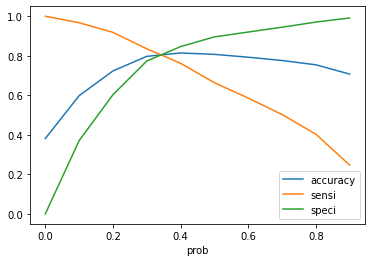

In [151]:
# Plotting as well to visualize

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, looks like 0.34 is the optimum point to take as cutoff probability

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.323651,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.144084,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.276217,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.802893,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.234879,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [153]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8056586270871985

In [154]:
# Let's re-create the confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3237,  765],
       [ 492, 1974]])

In [155]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [156]:
# Calculate Sensitivity

TP/(TP+FN)

0.8004866180048662

In [157]:
# Calculate Specificity

TN/(TN+FP)

0.8088455772113943

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1911544227886057


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7207009857612268


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8680611423974256


# Precision and recall tradeoff

In [161]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7207009857612268

In [162]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8004866180048662

In [163]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7585014409221902

In [164]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

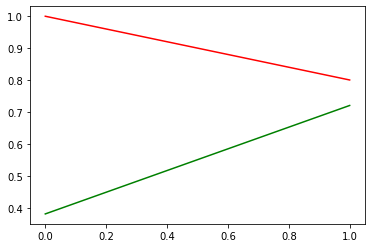

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [167]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.72      0.80      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.79      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



# Test Data Prediction

In [168]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other Managements,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2376,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
7766,0.290067,-0.777416,1.226321,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9199,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [169]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2376,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
7766,0.290067,-0.777416,1.226321,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9199,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4359,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [170]:
X_test_sm = sm.add_constant(X_test)

In [171]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,1.0,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2376,1.0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
7766,1.0,0.290067,-0.777416,1.226321,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9199,1.0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4359,1.0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,2.183068,-0.354744,-0.391967,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2152,1.0,-0.656434,-0.885371,-1.085519,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
7101,1.0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5331,1.0,-0.088533,2.056864,0.301585,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [172]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [173]:
y_test_pred[:10]

4269    0.598091
2376    0.893400
7766    0.598667
9199    0.061610
4359    0.817464
9186    0.538729
1631    0.357088
8963    0.186154
8007    0.041221
5324    0.317518
dtype: float64

In [174]:
# Converting y_test_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [175]:
# Let's see the head

y_pred_1.head()

,0
4269,0.598091
2376,0.893400
7766,0.598667
9199,0.061610
4359,0.817464


In [176]:
# Putting LeadID to index
y_pred_1['LeadID'] = y_pred_1.index
y_pred_1.head()

,0,LeadID
4269,0.598091,4269
2376,0.893400,2376
7766,0.598667,7766
9199,0.061610,9199
4359,0.817464,4359


In [177]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [178]:
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [179]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [181]:
# concatenating both the prediction and the orginal labels
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,LeadID,0,LeadID
4269,1,4269,0.598091,4269
2376,1,2376,0.893400,2376
7766,1,7766,0.598667,7766
9199,0,9199,0.061610,9199
4359,1,4359,0.817464,4359


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [184]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID','Converted','Conversion_Prob']]

In [185]:
# Check 'y_pred_final'
y_pred_final.head()

,LeadID,LeadID,Converted,Conversion_Prob
4269,4269,4269,1,0.598091
2376,2376,2376,1,0.893400
7766,7766,7766,1,0.598667
9199,9199,9199,0,0.061610
4359,4359,4359,1,0.817464


In [186]:
# Make predictions on the test set using 0.32 as the cutoff
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [187]:
# Let's see the head of y_pred_final

y_pred_final.head()

,LeadID,LeadID,Converted,Conversion_Prob,Predicted
4269,4269,4269,1,0.598091,1
2376,2376,2376,1,0.893400,1
7766,7766,7766,1,0.598667,1
9199,9199,9199,0,0.061610,0
4359,4359,4359,1,0.817464,1


In [188]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Lead Score'})

In [189]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)
accuracy_score

0.801948051948052

In [190]:
confusion_test_set = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
print(confusion_test_set)

[[1356  321]
 [ 228  867]]


In [191]:
TP = confusion_test_set[1,1] # true positive 
TN = confusion_test_set[0,0] # true negatives
FP = confusion_test_set[0,1] # false positives
FN = confusion_test_set[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7917808219178082

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085867620751341

In [194]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.19141323792486584


In [195]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7297979797979798


In [196]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8560606060606061


In [197]:
#precision
confusion_test_set[1,1]/(confusion_test_set[0,1]+confusion_test_set[1,1])

0.7297979797979798

In [198]:
#recall
confusion_test_set[1,1]/(confusion_test_set[1,0]+confusion_test_set[1,1])

0.7917808219178082

In [199]:
f1_score(y_pred_final.Converted, y_pred_final.Predicted)

0.7595269382391591

In [200]:
print(classification_report(y_pred_final.Converted, y_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1677
           1       0.73      0.79      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.79      0.80      0.80      2772
weighted avg       0.81      0.80      0.80      2772



Plotting precision recall curve again

In [201]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

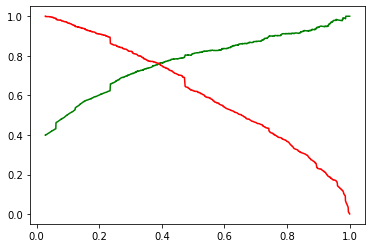

In [202]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [203]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [204]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False)

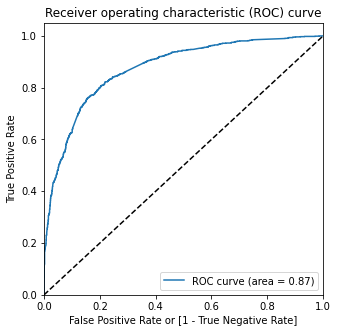

(array([0.        , 0.        , 0.        , ..., 0.99880739, 0.9994037 ,
        1.        ]),
 array([0.00000000e+00, 9.13242009e-04, 1.82648402e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.        , 1.        , 0.99949148, ..., 0.01936048, 0.01857562,
        0.01803256]))

In [205]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

Area under the ROC curve is around 0.87 which means our model seems to be doing well on the test set as well

In [206]:
y_pred_final.head()

,LeadID,LeadID,Converted,Conversion_Prob,Predicted
4269,4269,4269,1,0.598091,1
2376,2376,2376,1,0.893400,1
7766,7766,7766,1,0.598667,1
9199,9199,9199,0,0.061610,0
4359,4359,4359,1,0.817464,1


In [207]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,LeadID,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
4269,4269,4269,1,0.598091,1,59.809131
2376,2376,2376,1,0.893400,1,89.340024
7766,7766,7766,1,0.598667,1,59.866730
9199,9199,9199,0,0.061610,0,6.161008
4359,4359,4359,1,0.817464,1,81.746378


In [208]:
y_pred_final = pd.merge(data[['Lead Number']], y_pred_final,how='inner',left_index=True, right_index=True)

In [209]:
y_pred_final.head()  # test dataset with all the Lead Score values

,Lead Number,LeadID,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
0,660737,0,0,0,0.123394,0,12.339375
3,660719,3,3,0,0.074936,0,7.493602
10,660608,10,10,1,0.573538,1,57.353840
12,660562,12,12,1,0.714038,1,71.403843
13,660558,13,13,0,0.113258,0,11.325802


In [210]:
y_train_pred_df = y_train_pred_final[['Converted', 'Conversion_Prob', 'LeadID','Predicted']]
y_train_pred_df.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.323651,1871,0
1,0,0.144084,6795,0
2,0,0.276217,3516,0
3,0,0.802893,8105,1
4,0,0.234879,3934,0


In [211]:
y_train_pred_df = pd.merge(data[['Lead Number']], y_train_pred_df,how='inner',left_index=True, right_index=True)
y_train_pred_df.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted
0,660737,0,0.323651,1871,0
1,660728,0,0.144084,6795,0
2,660727,0,0.276217,3516,0
3,660719,0,0.802893,8105,1
4,660681,0,0.234879,3934,0


In [212]:
y_train_pred_df['Lead Score'] = y_train_pred_df['Conversion_Prob']*100

In [213]:
y_train_pred_df.head()     # train dataset with all the Lead Score values

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
0,660737,0,0.323651,1871,0,32.365056
1,660728,0,0.144084,6795,0,14.408386
2,660727,0,0.276217,3516,0,27.621704
3,660719,0,0.802893,8105,1,80.289277
4,660681,0,0.234879,3934,0,23.487928


# Final Dataset

In [217]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

TotalVisits                                             0.20
Total Time Spent on Website                             1.07
Page Views Per Visit                                   -0.15
Lead Origin_Landing Page Submission                    -0.40
Lead Origin_Lead Add Form                               3.08
Lead Origin_Lead Import                                -0.62
Lead Origin_Quick Add Form                             20.53
Lead Source_Google                                      0.38
Lead Source_Olark Chat                                  1.21
Lead Source_Organic Search                              0.21
Lead Source_Others                                      0.37
Lead Source_Welingak Website                            2.51
Last Activity_Email Opened                              1.31
Last Activity_Olark Chat Conversation                  -0.23
Last Activity_Others                                    0.53
Last Activity_SMS Sent                                  2.38
Specialization_Finance M

In [218]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                              0.89
Total Time Spent on Website                              4.82
Page Views Per Visit                                    -0.69
Lead Origin_Landing Page Submission                     -1.81
Lead Origin_Lead Add Form                               13.79
Lead Origin_Lead Import                                 -2.78
Lead Origin_Quick Add Form                              91.98
Lead Source_Google                                       1.72
Lead Source_Olark Chat                                   5.42
Lead Source_Organic Search                               0.94
Lead Source_Others                                       1.65
Lead Source_Welingak Website                            11.23
Last Activity_Email Opened                               5.87
Last Activity_Olark Chat Conversation                   -1.04
Last Activity_Others                                     2.38
Last Activity_SMS Sent                                  10.67
Speciali

In [219]:

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

In [220]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(3)

,Variables,Relative coeffient value
0,What is your current occupation_Housewife,100.00
1,Lead Origin_Quick Add Form,91.98
2,Lead Origin_Lead Add Form,13.79


The Top 3 Variables which are adding to the conversion of a lead are

1 - Current Occupation - Housewife

2 - Lead Origin - Quick Add Form

3 - Lead Origin_Lead Add Form

In [221]:
# Next we will see what the top 10 to figure where the team should focus next in their free time to get more leads
feature_importance_df.head(10)

,Variables,Relative coeffient value
0,What is your current occupation_Housewife,100.00
1,Lead Origin_Quick Add Form,91.98
2,Lead Origin_Lead Add Form,13.79
3,Lead Source_Welingak Website,11.23
4,Last Activity_SMS Sent,10.67
5,What is your current occupation_Working Profes...,9.83
6,Last Activity_Email Opened,5.87
7,Lead Source_Olark Chat,5.42
8,Total Time Spent on Website,4.82
9,Last Activity_Others,2.38


Apart from the top 3, the team can focus on above to have more converts. 
Their free time focus should be more on improving and attracting leads through the above